In [1]:
#   ---------------------------------------        IMPORTS     ------------------------------------------
from CrearDataset import crearDataLoaders
from Modelos import UNet
from Entrenamiento import entrenamiento
from Evaluacion import evaluacion
from MostrarResultados import mostrarCelulaEjemplo

import torch.cuda

cpu
40 10


In [2]:
#   ---------------------------------------        GPU          ------------------------------------------

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
#   ----------------------------------        DATALOADER     ------------------------------------

# Elegimos el tamaño del batch a 1 debido a que nuestro dataset no tiene muchos datos
train_loader, valid_loader = crearDataLoaders(BATCH_SIZE=1)

imgs, masks = next(iter(train_loader))
print(imgs.shape, masks.shape)

torch.Size([1, 3, 224, 224]) torch.Size([1, 1, 224, 224])


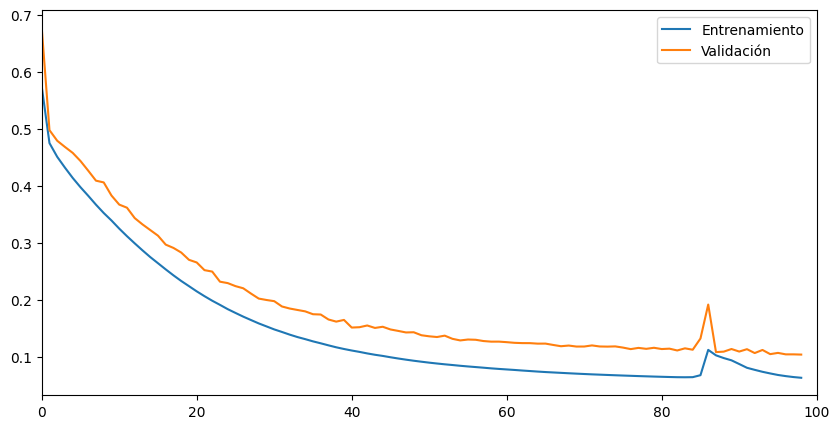

Epoch:100 Training Loss:0.06200305670499802 Validation Loss:0.10448511242866516:


In [24]:
#   ----------------------------------        ENTRENAMIENTO     ------------------------------------
# Nuestro modelo es la UNET
model = UNet().to(device)
entrenamiento(model, device,train_loader, valid_loader,"pesos_UNET.pt")



In [4]:
#   ----------------------------------        EVALUACIÓN     ------------------------------------

mmodel =  UNet().to(device)
mmodel.load_state_dict(torch.load("pesos_UNET.pt"))
mmodel.eval() # Configuramos el modelo para la evaluación

evaluacion(mmodel, device, valid_loader)

DiceScore entrenamiento promedio: 0.9291545927524567
Iou entrenamiento promedio: 0.8684059739112854


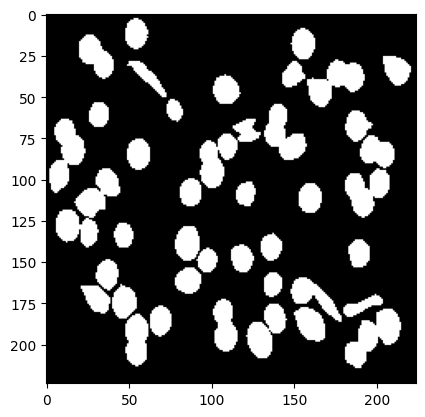

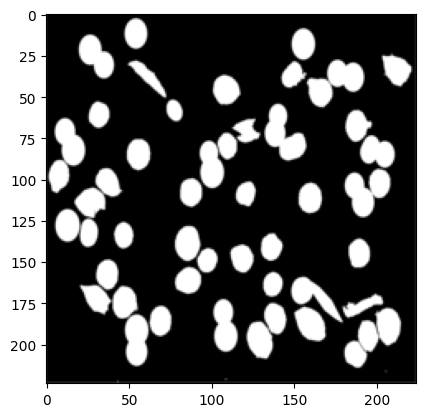

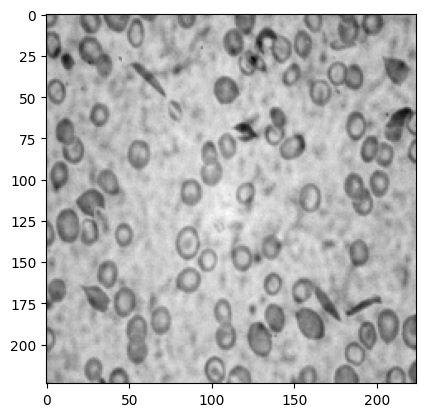

In [5]:
#   ----------------------------------        MOSTRAR RESULTADOS     ------------------------------------
mostrarCelulaEjemplo(mmodel, valid_loader)
# Primera imagen: Máscara predicha
# Segunda imagen: Máscara original
# Tercera imagen: Imagen original